# Walmart's Weekly Sales Analysis and Prediction

In [ ]:
in the file Walmart_Store_sales. Within this file you will find the following fields:\

Store - the store number
Date - the week of sales
Weekly_Sales - sales for the given store
Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
Temperature - Temperature on the day of sale
Fuel_Price - Cost of fuel in the region
CPI – Prevailing consumer price index
Unemployment - Prevailing unemployment rate
Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Importing the required data modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport

2.DATA_WRANGLING

In [3]:
sales = pd.read_csv("Walmart.csv")
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
sales.duplicated().sum()

0

PERFORMING UNIVARIENT ANALYSIS AND MULTIVARIENT ANALYSIS USING PANDAS PROFILING CHEKC THE OUTPUT FILE TO SEE THE REPORT

In [8]:
profile = ProfileReport(sales)
profile.to_file("Walmart.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Outlier Detection

In [9]:
#outlier_detection
def find_outlier_rows(df,col,level='both'):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    #compute the upper and lower bound
    lower_bound = df[col].quantile(0.25) - (iqr * 1.5)
    upper_bound = df[col].quantile(0.75) + (iqr * 1.5)
    if level == 'both':
        return df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    elif level == 'lower':
        return df[(df[col] < lower_bound)]
    elif level == 'upper':
        return df[(df[col] > upper_bound)]
    else:
        print("level should be 'both', 'lower' or 'upper'")
        return None

In [10]:
#count_outlier function
def count_outlier(df):
    df_numeric = df.select_dtypes(include=['int','float'])
    columns = df_numeric.columns
    outlier_columns = [col for col in columns if len(find_outlier_rows(df_numeric,col)) != 0]
    outlier_df = pd.DataFrame(columns=['outlier_counts','outlier_percent'])

    for col in outlier_columns:
        outlier_count = len(find_outlier_rows(df_numeric,col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries,2)
        outlier_df.loc[col] = [outlier_count,outlier_percent]
    return outlier_df


In [11]:
count_outlier(sales).sort_values('outlier_counts',ascending=False)

,outlier_counts,outlier_percent
Unemployment,481.0,7.47
Holiday_Flag,450.0,6.99
Weekly_Sales,34.0,0.53
Temperature,3.0,0.05


In [12]:
find_outlier_rows(sales,'Unemployment')['Unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: Unemployment, dtype: float64

In [13]:
def outlier_treatment():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(sales[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        sales[i]  = np.where(sales[i]>uw,uw,(np.where(sales[i]<lw,lw,sales[i])))
        
outlier_treatment()

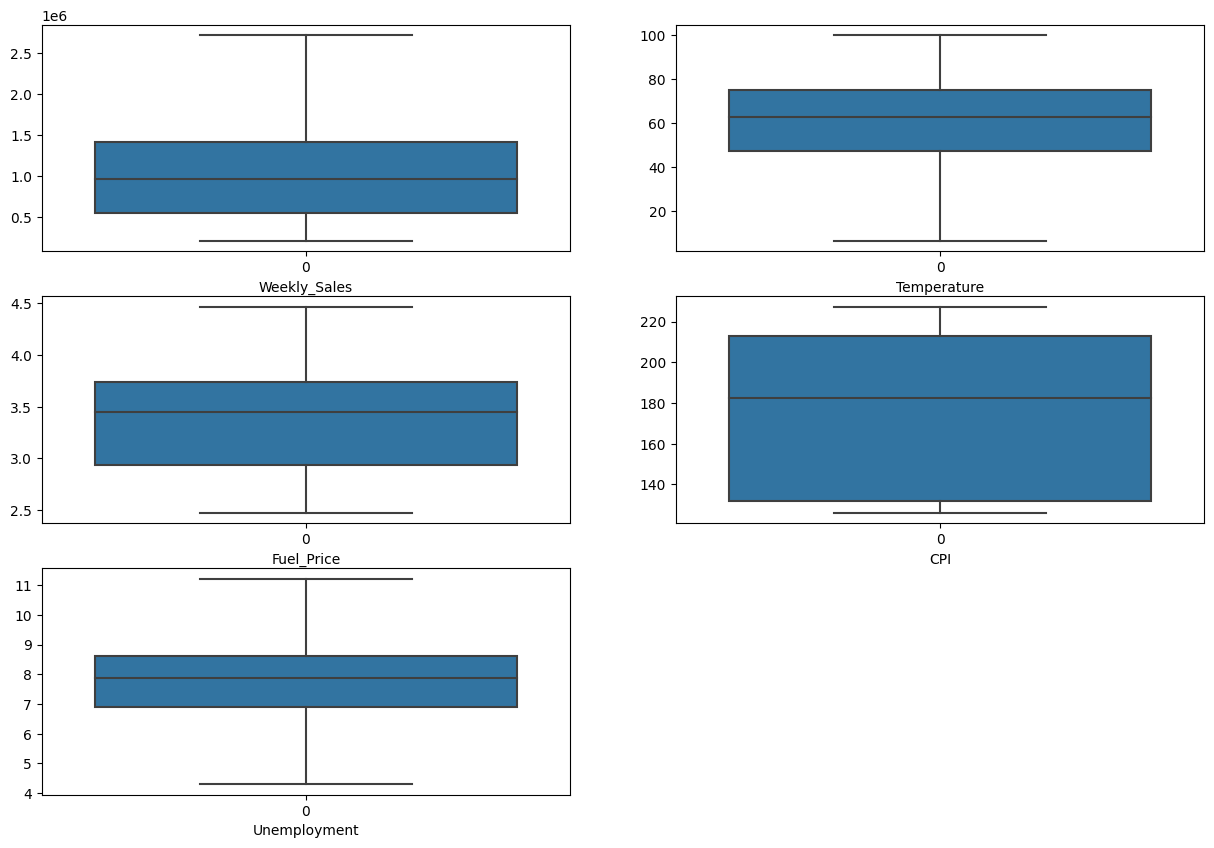

In [14]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(sales[i]);
            plt.xlabel(i);

Feature_Engineering

In [15]:
sales['Date'] = pd.to_datetime(sales['Date'],infer_datetime_format=True)

c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Program Files\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format o

In [16]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [17]:
sales['year'] = sales['Date'].dt.year
sales['month'] = sales['Date'].dt.month
sales['day'] = sales['Date'].dt.day

In [18]:
sales.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2


# 3.Exploratory Data Analysis

In [19]:
#get the summary statistics of the dataset
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.045029e+06,0.069930,60.665183,3.358607,171.578394,7.871208,2010.965035,6.475524,15.650350
std,12.988182,5.572961e+05,0.255049,18.440508,0.459020,39.356712,1.520694,0.797019,3.321797,8.753908
min,1.000000,2.099862e+05,0.000000,6.240000,2.472000,126.064000,4.294500,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,23.000000
max,45.000000,2.720371e+06,1.000000,100.140000,4.468000,227.232807,11.218500,2012.000000,12.000000,31.000000


THE WEEKLY TRANSACTION OCCURED OVER THE PERIOD OF THREE-YEAR (2010-2012) IN 45 SOTRES THE MAXIMUM WEEKLY SALES 2.7 MILLION AND THE HOTTEST DAY WAS 100 F

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>],
       [<AxesSubplot:title={'center':'Holiday_Flag'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>, <AxesSubplot:>]],
      dtype=object)

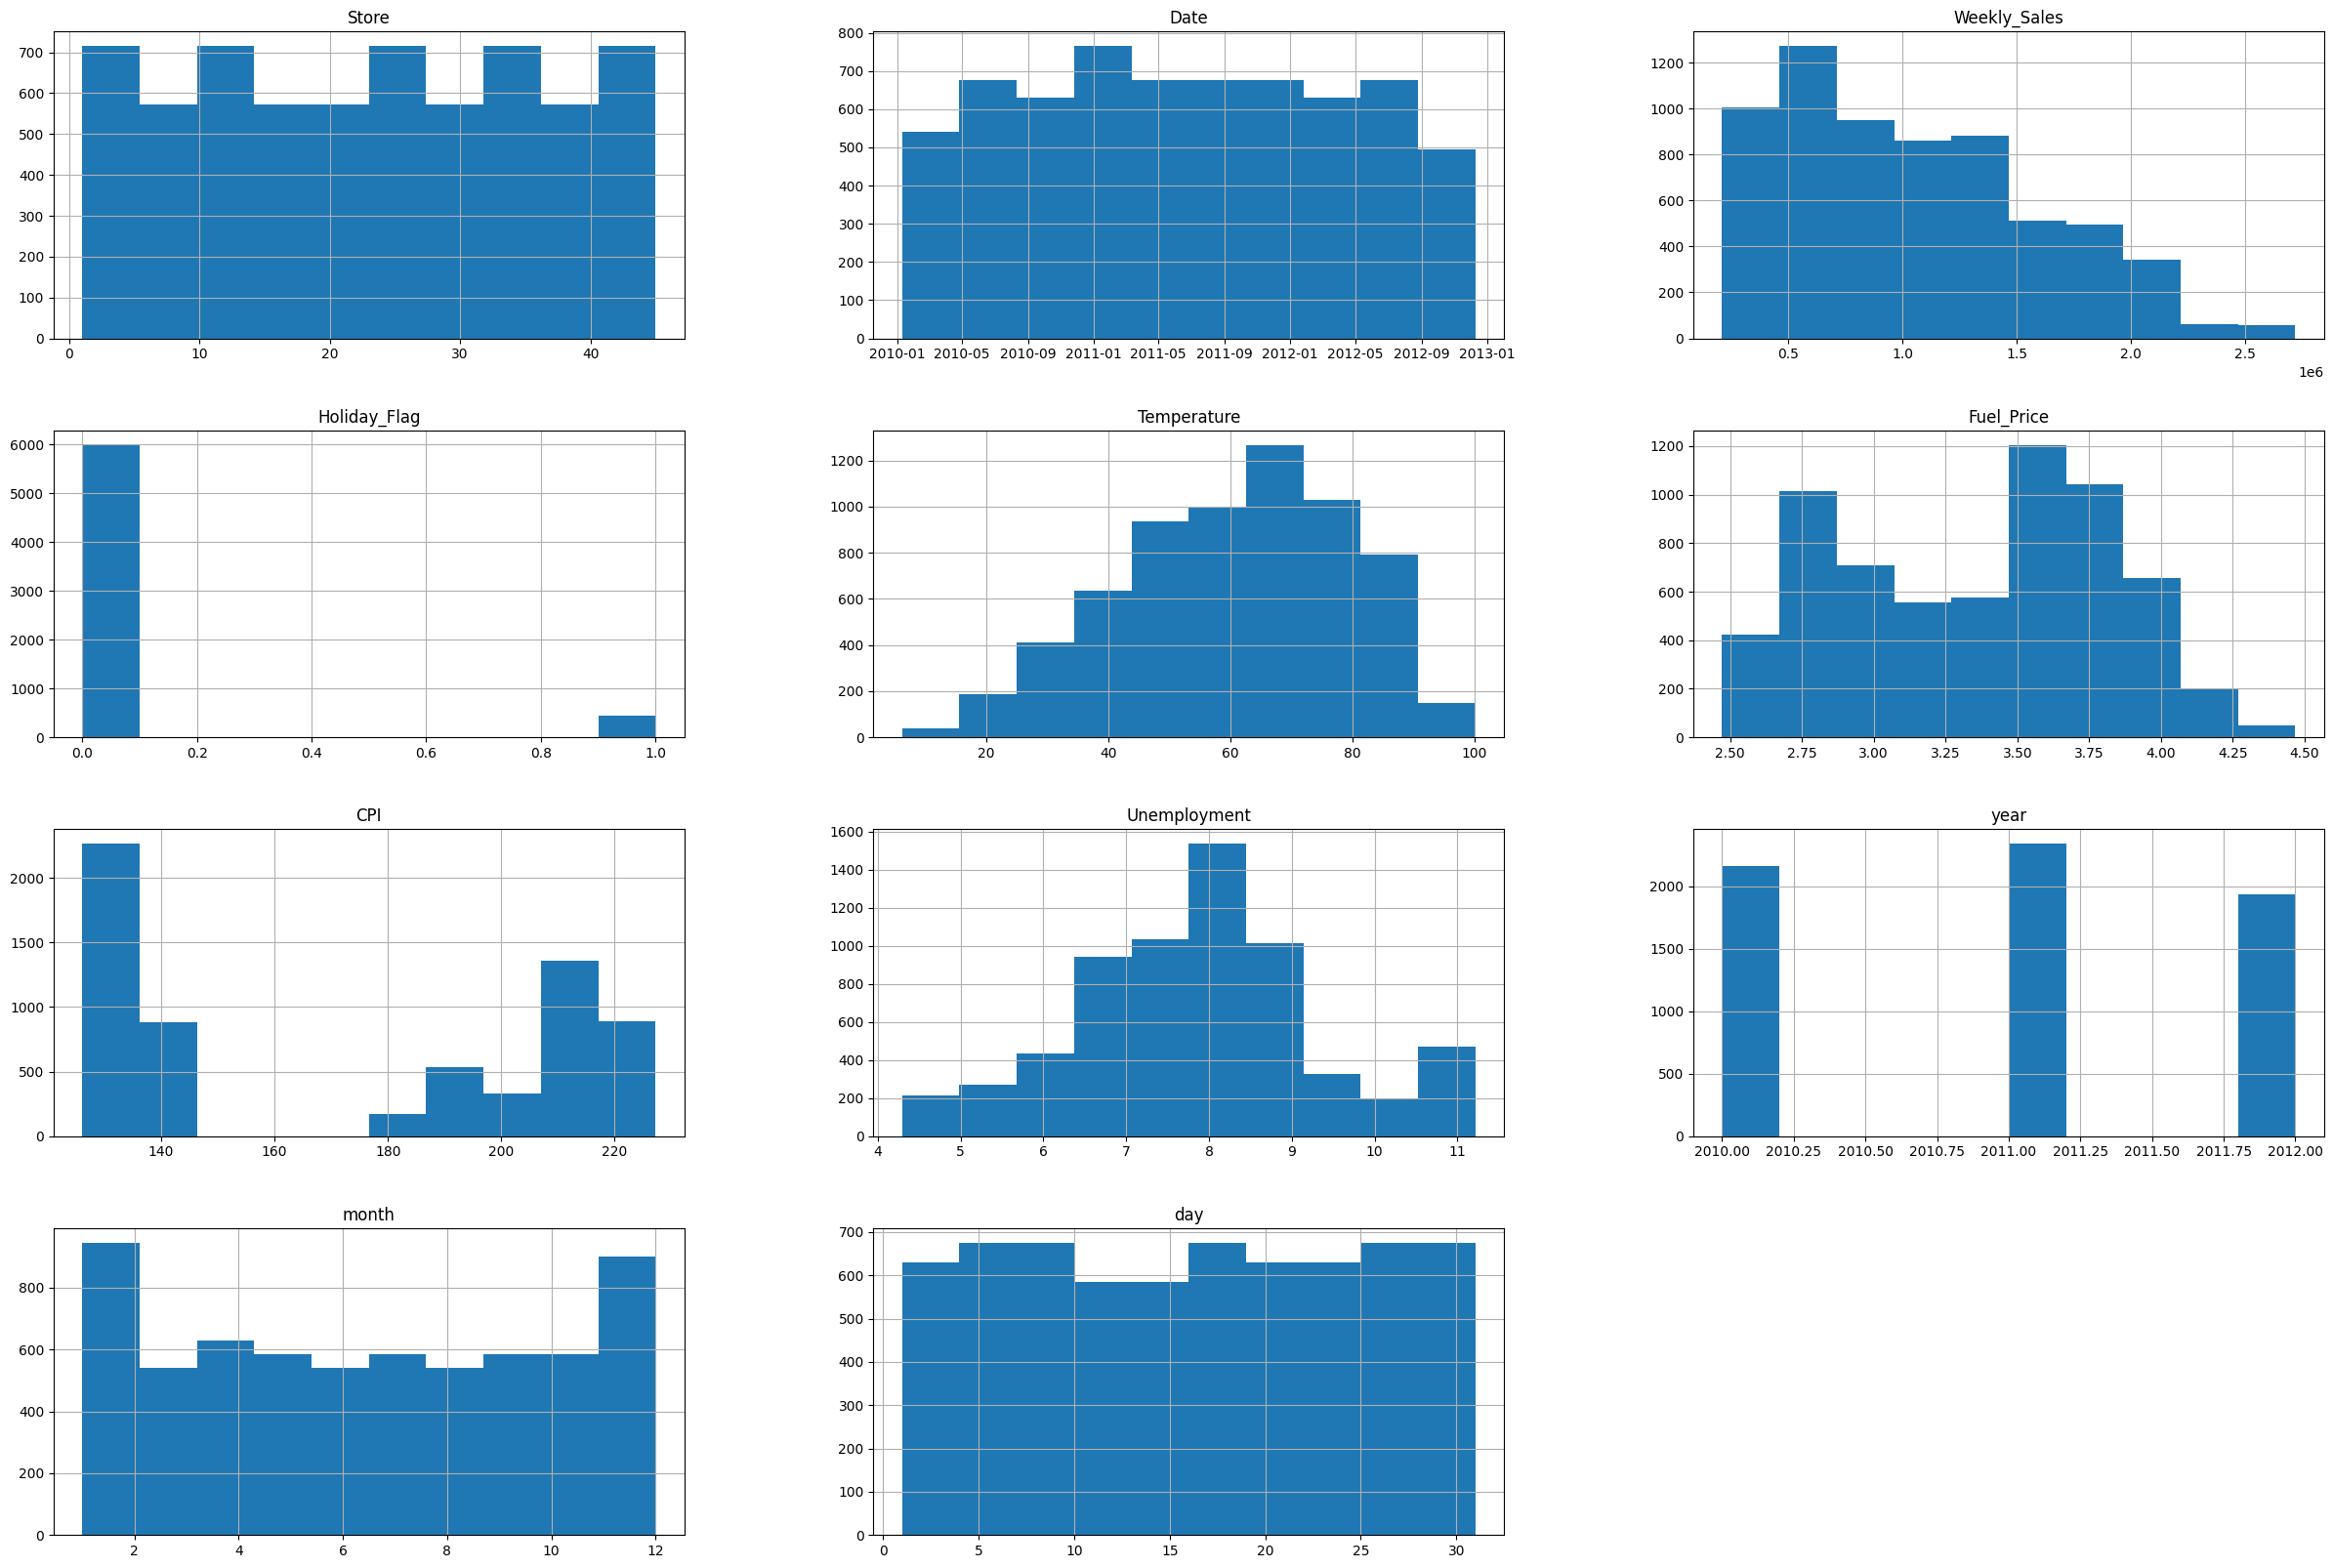

In [20]:
sales.hist(figsize=(30,20))

from the above graph we can conclude that 1.the no of transaction occured almost evenly across various sotres and years 2.weekly sales is right skwed data .onl ya few of the weeks sales are above 2 million usd. 3.the temperature is approximately normal 4.the distribution of the fuel_price is bi_modal.5.cpi formed two cluster 5.unemployment rate is nearly distributes

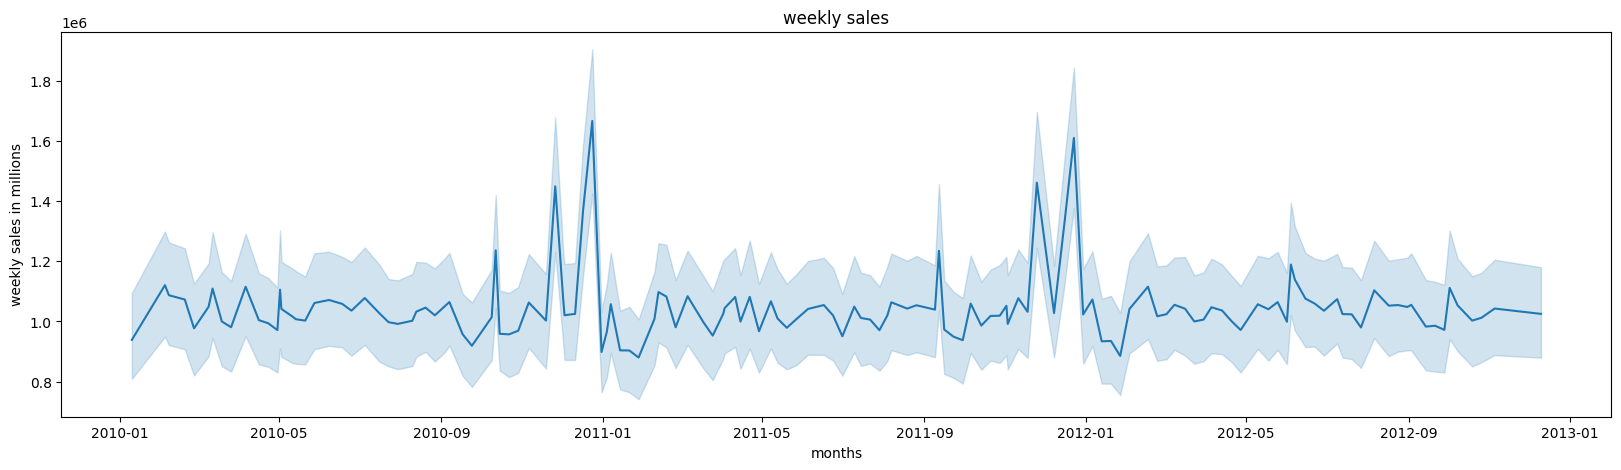

In [21]:
#plot the line chart of the weekly_sales
fig,ax = plt.subplots(figsize=(20,5))
sns.lineplot(x=sales['Date'],y=(sales.Weekly_Sales))
plt.xlabel('months')
plt.ylabel('weekly sales in millions')
plt.title("weekly sales")
annot = ax.annotate("",xy=(0,0),xytext=(20,20),textcoords="offset points",
bbox=dict(boxstyle="round",fc='w'),arrowprops=dict(arrowstyle="->"))

The line plot reavels that sales at walmart generally remain stable throughout the year ,with the exception of november abd decenber.which experiences a significant increases in sales.this trend is likely due yo the ho;idays season,when consumers typically make more purchases and retailer offers promotional abd discounts

In [22]:
#create a pivot table 
pivot_table  = sales.pivot_table(index='month',columns='year',values='Weekly_Sales')
pivot_table

year,2010,2011,2012
month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
6,1.055082e+06,1.038471e+06,1.082920e+06
7,1.023702e+06,9.976049e+05,1.025480e+06
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05


In [23]:
yearly_sales = sales.groupby('year')['Weekly_Sales'].sum()
yearly_sales

year
2010    2.281974e+09
2011    2.442656e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

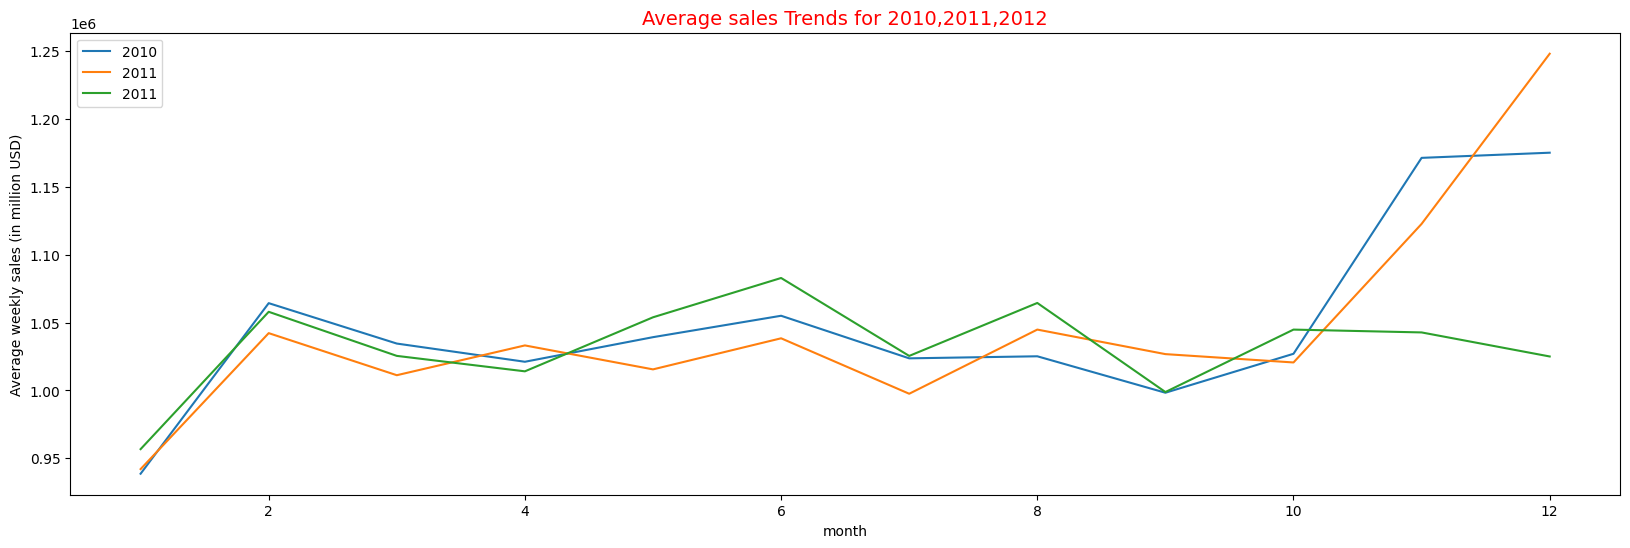

In [24]:
#plot the average sales year wise 
fig ,ax = plt.subplots(figsize=(20,6))
sns.set_palette("dark")
sns.lineplot(x=pivot_table.index, y = pivot_table[2010], ax=ax, label='2010')
sns.lineplot(x=pivot_table.index, y = pivot_table[2011], ax=ax, label='2011')
sns.lineplot(x=pivot_table.index, y = pivot_table[2012], ax=ax, label='2011')
plt.ylabel('Average weekly sales (in million USD)')
plt.title('Average sales Trends for 2010,2011,2012',fontdict={"fontsize":14,'color':'red'})
plt.legend()

HERE WE CAN OBSERVE THAT THE LINE CHARTS FOR THREE YEARS FOR THE MONTH OF JANUARY - DECEMBER. EVERY YEAR THE SALES ARE PREATY MUCH STEADY.BUT THERE IS ALWAYS A RISE AT THE END OF EACH YEAR BECAUSE OF THE HOLIDAY SEASO.WE CAN ALSO SEE OBSERVE THAT 2010 although perform low as comaprd to 2011 but still it have a steady growth over the year.

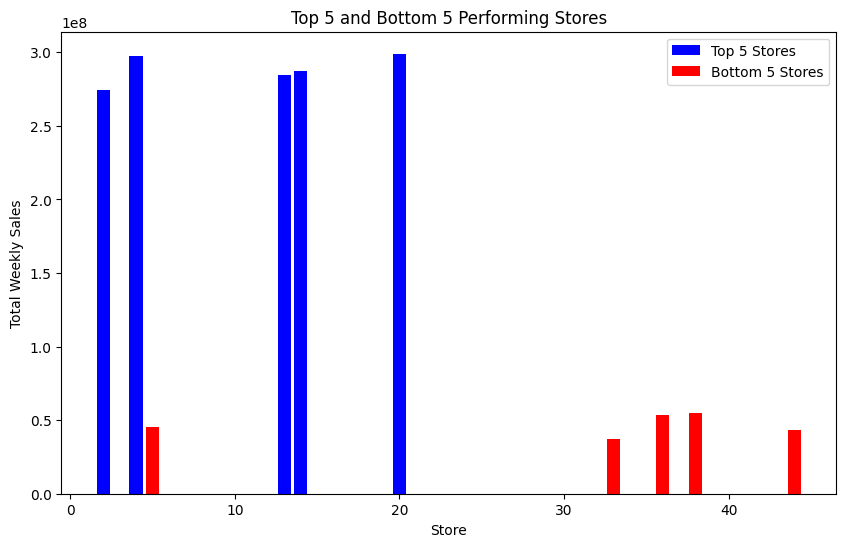

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming your data is in a dataframe called 'df'
# groupby Store and sum Weekly_Sales for each Store
store_sales = sales.groupby('Store')['Weekly_Sales'].sum()

# sort stores by total sales in descending order
sorted_stores = store_sales.sort_values(ascending=False)

# get the top 5 and bottom 5 stores
top_stores = sorted_stores.head(5)
bottom_stores = sorted_stores.tail(5)

# create a bar plot of the top and bottom stores
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_stores.index, top_stores.values, label='Top 5 Stores', color='b')
ax.bar(bottom_stores.index, bottom_stores.values, label='Bottom 5 Stores', color='r')
ax.set_xlabel('Store')
ax.set_ylabel('Total Weekly Sales')
ax.set_title('Top 5 and Bottom 5 Performing Stores')
ax.legend()


THIS GRAPH SHOW THAT TOP 5 PERFORMING STORES HAVE A ANNUAL SALES GREATER THAN 2.5 MILLLION USD WHERE AS THE LOWER SOTRES HAVE A ANNUAL STORES OF LESSAN A HALF-MILLION USD 

In [26]:
#FILTER OUT HOLIDAY AND NON-HOLIDAY WEEKLY SALES   
non_holiday_sales = sales[sales['Holiday_Flag'] == 0]
holiday_sales = sales[sales['Holiday_Flag'] == 1]

Text(0.5, 1.0, 'Box plots of non-holiday and holiday weekly sales')

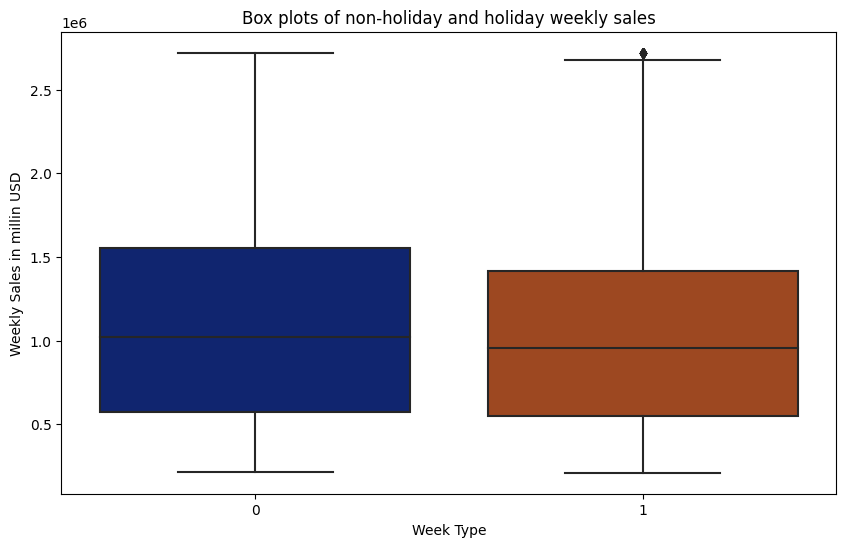

In [27]:
fid,ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=[holiday_sales['Weekly_Sales'],non_holiday_sales['Weekly_Sales']])
plt.ylabel('Weekly Sales in millin USD')
plt.xlabel('Week Type')
plt.title('Box plots of non-holiday and holiday weekly sales')

as we have treated outliers earlier we can see that both the holiday as well as non-holiday are having the same sales 

In [28]:
corr = sales.corr()
corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
Store,1.000000e+00,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964,3.474318e-12,6.289676e-16,-1.070464e-15
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662,-1.634436e-02,6.274356e-02,-1.818256e-02
Holiday_Flag,-4.386841e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204,-5.678257e-02,3.322341e-01,-3.603594e-02
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315,6.428798e-02,6.639379e-02,8.893971e-02
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428,7.794703e-01,-5.283174e-02,3.253169e-02
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542,7.479573e-02,1.478843e-03,3.965821e-03
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000,-2.526376e-01,-2.635815e-03,-8.809278e-03
year,3.474318e-12,-0.016344,-5.678257e-02,0.064288,0.779470,0.074796,-0.252638,1.000000e+00,-1.390145e-01,-1.277942e-02
month,6.289676e-16,0.062744,3.322341e-01,0.066394,-0.052832,0.001479,-0.002636,-1.390145e-01,1.000000e+00,5.959249e-03
day,-1.070464e-15,-0.018183,-3.603594e-02,0.088940,0.032532,0.003966,-0.008809,-1.277942e-02,5.959249e-03,1.000000e+00


<AxesSubplot:>

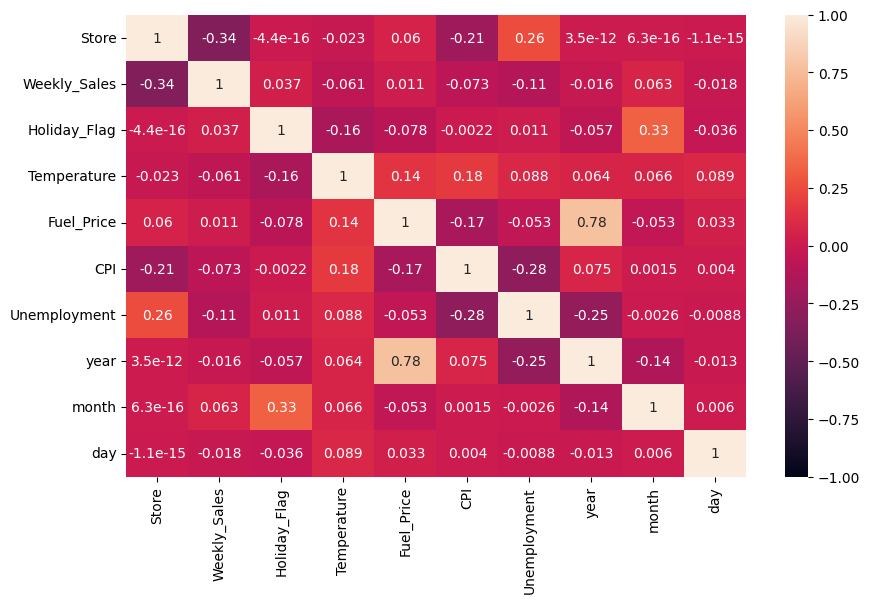

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

# Model Selection and Evaluation

In [30]:
sales_copy = sales.copy()

In [31]:
sales_copy.drop(columns=['Date'],inplace=True)
sales_copy.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


In [32]:
x = sales_copy.drop(columns=['Weekly_Sales'],axis=1)
y = sales_copy['Weekly_Sales']

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,accuracy_score

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
scaler = StandardScaler()
x_train_fit = scaler.fit_transform(x_train)
x_test_fit = scaler.transform(x_test)

In [37]:
y_train

99      1497462.72
5641     847246.50
1970    1893447.71
179     1794355.49
3300    1264117.01
           ...    
1099    1462254.05
2514     951549.61
3606    1042226.30
5704     979848.71
2575    1536549.95
Name: Weekly_Sales, Length: 5148, dtype: float64

# Linear Regressor

In [38]:
lr = LinearRegression()
lr.fit(x_train_fit,y_train)
lr_pred = lr.predict(x_test_fit)
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
print(rmse)

525502.1895022511


# Decision Tree Regressor

In [41]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_fit,y_train)
dtr_pred = dtr.predict(x_test_fit)
rmse = np.sqrt(mean_squared_error(dtr_pred,y_test))
print(rmse)

144184.84682135406


# Random forest Regressor

In [42]:
rfr = RandomForestRegressor()
rfr.fit(x_train_fit,y_train)
rfr_pred = rfr.predict(x_test_fit)
rmse = np.sqrt(mean_squared_error(rfr_pred,y_test))
print(rmse)

115487.35145990498


# support vector Regressor

In [43]:
svr = SVR()
svr.fit(x_train_fit,y_train)
svr_pred = svr.predict(x_test_fit)
rmse = np.sqrt(mean_squared_error(svr_pred,y_test))
print(rmse)

568809.3007771848


In [48]:
#Stores the result in a form of table 
import pandas as pd

data = {'Model': ['LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor', 'support vector regressor'],
        'Value': [5.255021895022500e5, 1.1548735145989999e5, 1.4418484682135000e5, 5.688093007771800e5]}

df = pd.DataFrame(data)

print(df)

                      Model          Value
0          LinearRegression  525502.189502
1     RandomForestRegressor  115487.351460
2     DecisionTreeRegressor  144184.846821
3  support vector regressor  568809.300777


AS WE CAN SEE THAT RANDOM FOREST HAS THE SMALLEST VALUE AND THE BEST OUTCOME OUT OF ALL THE ALGORITHM

In [50]:
median_sales = sales['Weekly_Sales'].median()

percent_deviation = round((1.1548735145989999e5*100/median_sales),2)

print(f"the model has average percentage error of {percent_deviation}")

the model has average percentage error of 12.02


# CONCLUSION

Our analysis show that sales during holidays are significantly higher than duration non-holidays weeks,with sales doubling on average .additionally,there is a strong component to the sales data. The best model for predictin future sales is the random forest regressor model which achieved an RMSE of 1.15e+05.This is good estimate as it is 88% close to the median sales of the data